# <center>Convolutional Neural Networks</center>
## <center>Inclass Project 4 - MA4144</center>

This project contains 5 tasks/questions to be completed, some require written answers. Open a markdown cell below the respective question that require written answers and provide (type) your answers. Questions that required written answers are given in blue fonts. Almost all written questions are open ended, they do not have a correct or wrong answer. You are free to give your opinions, but please provide related answers within the context.

After finishing project run the entire notebook once and **save the notebook as a pdf** (File menu -> Save and Export Notebook As -> PDF). You are **required to upload this PDF on moodle**.

***

## Outline of the project

The aim of the project is to practically learn and implement about CNN. This project will have two main sections.

Section 1: Build a convolutional layer and pooling layer from scratch. Then test them on a sample image.

Section 2: Use the Keras library to implement a CNN to classify images on the [CIFAR10 dataset](https://www.cs.toronto.edu/~kriz/cifar.html).

***


Use the below cell to use any include any imports

In [97]:
import numpy as np
import matplotlib.pyplot as plt
import random
from keras.preprocessing.image import load_img,img_to_array
import keras
from keras import layers, models
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report
import seaborn as sns

## Section 1: Convolution and Pooling

**Q1** In the following cell, implement a method called create_padding. The method will take in input_image ($n \times m$) and will return a zero-padded image called output_image of dimension $(n + 2d) \times (m + 2d)$ where $d$ is the padding thickness on either side.

In [2]:
def create_padding(input_image, d):
    n, m = input_image.shape
    updated_dim= (n + 2 * d, m + 2 * d)
    
    output_image = np.zeros(updated_dim)
    
    output_image[d:d + n, d:d + m] = input_image
    
    return output_image
    

In [5]:
#Extra cell
out=create_padding(np.zeros((3,5)),1)
print(out.shape)

(5, 7)


**Q2** In the following cell, implement a method called convolution. The method will take in input_image ($n \times m$), kernel ($k \times k$) and will return output_image of dimension $(n - k + 1) \times (m - k + 1)$. The output_image is the result of the convolution between input_image and kernel. You may assume that the stride is $1$.

In [9]:
def convolution(input_image, kernel):
    n, m = input_image.shape
    k=kernel.shape[0]
    output_image=np.zeros((n-k+1,m-k+1))
    for i in range(0,n-k+1,1):
        for j in range(0,m-k+1,1):
            for a in range(0,k,1):
                for b in range(0,k,1):
                    output_image[i][j]+=kernel[a][b]*input_image[i+a][j+b]

    return output_image

In [12]:
#Extra cell
inp=np.array([[0,1,2],[3,4,5],[6,7,8]])
ker=np.array([[0,1],[2,3]])
out=convolution(inp,ker)
print(out)
#print(out[0][0],out[0][1],out[1][0],out[1][1])

[[19. 25.]
 [37. 43.]]


**Q3** In the following cell, implement a method called pooling. The method will take in input_image ($n \times m$), $p$ the pooling dimension, pooling_type (either max_pooling or avg_pooling) and will return output_image of dimension $(n - p + 1) \times (m - p + 1)$. The output_image is the result of performing pooling on input_image by a window of dimension $p \times p$. You may assume that the stride is $1$.

In [21]:
def pooling(input_image, p, pooling_type = "max_pooling"):
    n, m = input_image.shape
    output_image=np.zeros((n-p+1,m-p+1))
    
    if pooling_type == "max_pooling":
        
        for i in range(0,n-p+1,1):
            for j in range(0,m-p+1,1):
                max=input_image[i][j]
                for a in range(0,p,1):
                    for b in range(0,p,1):
                        if max< input_image[i+a][j+b]:
                            max=input_image[i+a][j+b]
                            output_image[i][j]=max
        

    elif pooling_type == "avg_pooling":
        output_image = output_image.astype(float)  # Convert to float
        for i in range(0,n-p+1,1):
            for j in range(0,m-p+1,1):
                for a in range(0,p,1):
                    for b in range(0,p,1):
                        output_image[i][j]+=input_image[i+a][j+b]
                output_image[i][j]=output_image[i][j]/(p*p)

    else:
        print("Error: Invalid pooling type")
        return

    return(output_image)
    

In [16]:
#Extra cell
inp=np.array([[0,1,2],[3,4,5],[6,7,8]])
p=2
out=pooling(inp,p)
print(out)

[[4. 5.]
 [7. 8.]]


In [22]:
#Extra cell
inp=np.array([[0,5,5,3],[1,3,2,1],[6,2,0,8],[3,1,5,3]])
p=2
out=pooling(inp,p,"avg_pooling")
print(out)

[[2.25 3.75 2.75]
 [3.   1.75 2.75]
 [3.   2.   4.  ]]


The 'lena' image is widely used for image processing experiments and has been a benchmark image until recently.
We will use a $512 \times 512$ grayscale lena sample to test our convolution and pooling implementations.

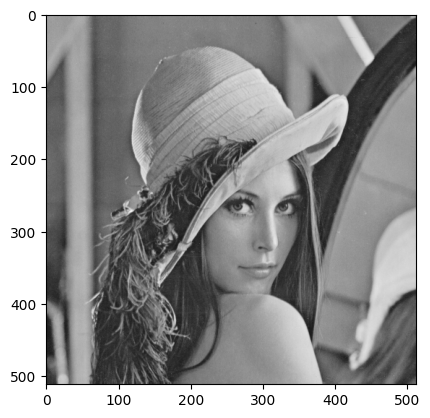

In [23]:
lena = load_img('lena.gif')
plt.imshow(lena)
plt.show()

**Q4** In the following perform convolution on lena. Make sure you use padding appropriately to maintain the image size after convolution. However, pooling should be done on an unpadded image and image size may not be preseved after pooling. Use the following kernels to perform convolution separately.

1. $\begin{bmatrix} +1 & 0 & -1 \\ +1 & 0 & -1 \\ +1 & 0 & -1 \end{bmatrix}$
   
2. $\begin{bmatrix} -1 & -1 & -1 \\ 0 & 0 & 0 \\ +1 & +1 & +1 \end{bmatrix}$
 
3. $\begin{bmatrix} -1 & 0 & +1 \\ -2 & 0 & +2 \\ -1 & 0 & +1 \end{bmatrix}$

4. $\begin{bmatrix} +1 & +2 & +1 \\ 0 & 0 & 0 \\ -1 & -2 & -1 \end{bmatrix}$

5. Any other kernel that you may find interesting.

<font color='blue'>Explain what the above kernels (including your choice) will do to the image.</font>

**Answer** <span style="color: green;">
Kernels are used to detect various features like patterns,edges and textures in the images.
Considering the kernels above, kernel 1 would detect vertical edges. Kernel 2 is a horizontal edge detection kernel. Kernel 3 is a vertical Sobel kernel that detects vertical edges emphasizing pixels where there are rapid intensity changes. Kernel 4 can be identified as horizontal Sobel kernel for detecting horizontal edges emphasizing pixels where there are rapid intensity changes. Kernel 5 is blur kernel that applies box blur effect by averaging the pixel values in the neighborhood.
</span>


Input image dimensions:  (512, 512, 3)


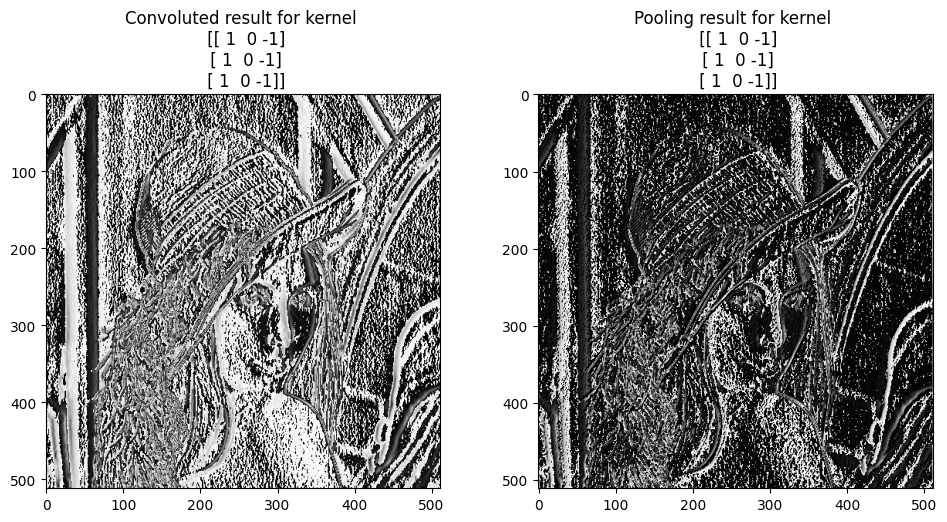

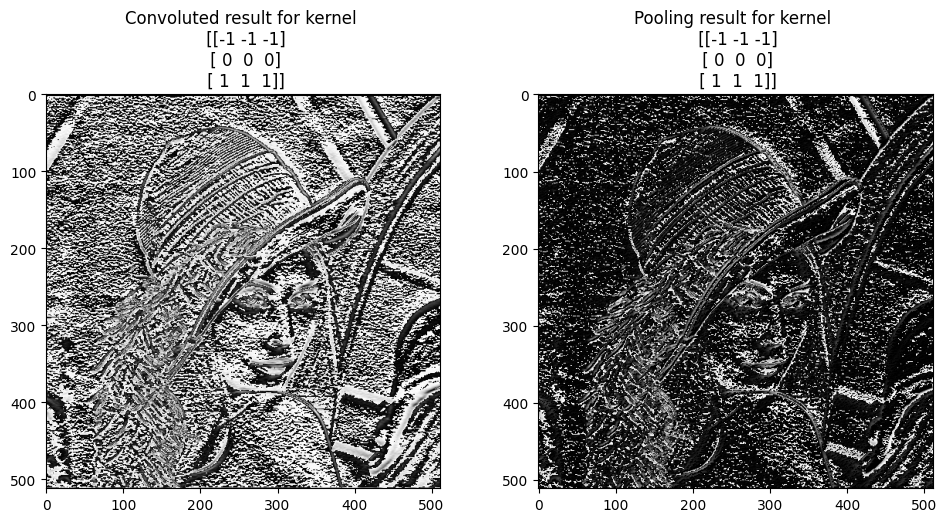

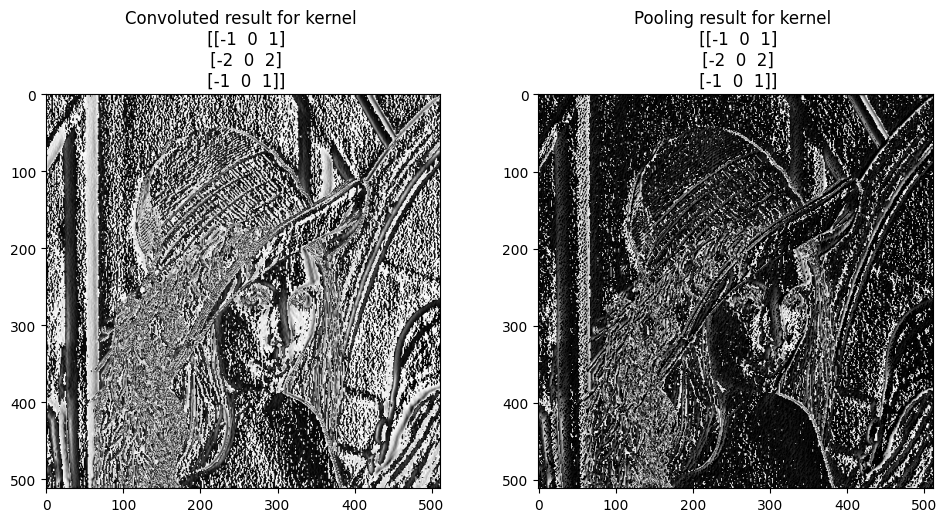

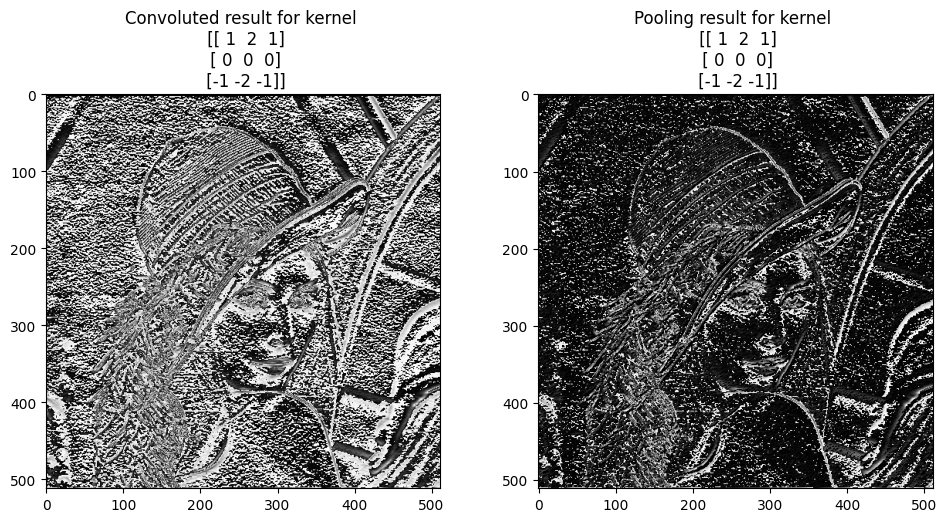

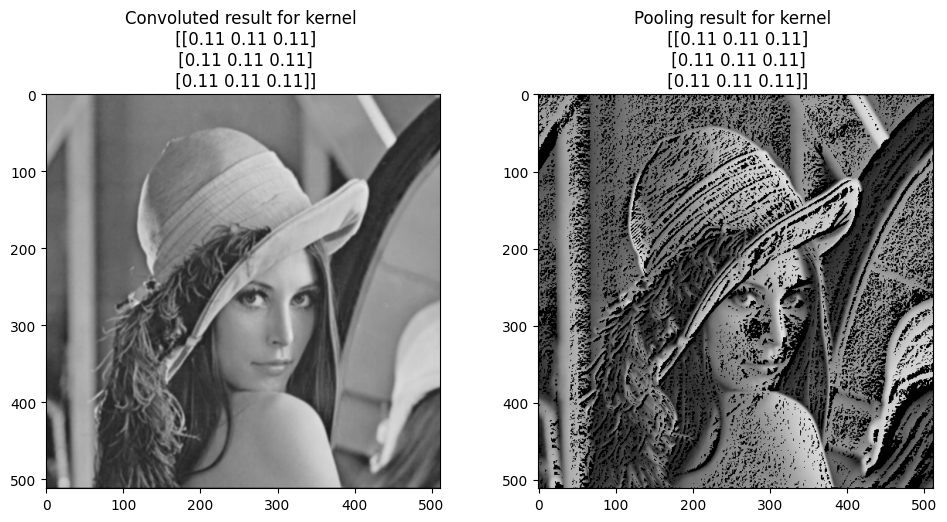

In [46]:
input_image=img_to_array(load_img('lena.gif')) # Open image an export as a numpy array
print("Input image dimensions: ",input_image.shape)
kernels=[np.array([[1,0,-1],[1,0,-1],[1,0,-1]]),np.array([[-1,-1,-1],[0,0,0],[1,1,1]]),np.array([[-1,0,1],[-2,0,2],[-1,0,1]]),
         np.array([[1,2,1],[0,0,0],[-1,-2,-1]]),np.array([[0.11,0.11,0.11],[0.11,0.11,0.11],[0.11,0.11,0.11]])]
for kernel in kernels:
    processed_channels_convolution = []
    processed_channels_pooling=[]
    # Convolution and pooling for each channel
    for channel in range(input_image.shape[2]):
        single_channel = input_image[:, :, channel]
        padded_channel=create_padding(single_channel,d=1) #Padding
        convoluted_channel=convolution(padded_channel,kernel) #Convolution
        processed_channels_convolution.append(convoluted_channel)
        pooled_channel=pooling(convoluted_channel,p=2) #Pooling the convoluted channel
        processed_channels_pooling.append(pooled_channel)
    
    # Merging convoluted and pooled channels separately
    convoluted_image = np.stack(processed_channels_convolution, axis=-1)
    pooled_image = np.stack(processed_channels_pooling,axis=-1)
    
    
    # Create a figure with two subplots
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))  # 1 row, 2 columns
    
    # Display image after convolution
    axs[0].imshow(convoluted_image.astype('uint8'))
    axs[0].set_title(f"Convoluted result for kernel \n {kernel}")
    # axs[0].text(0.5, -0.2, f"Dimensions: {convoluted_image.shape}", ha='center', va='center', transform=axs[0].transAxes)
    
    # Display image after pooling
    axs[1].imshow(pooled_image.astype('uint8'))
    axs[1].set_title(f"Pooling result for kernel \n {kernel}")
    # axs[1].text(0.5, -0.2, f"Dimensions: {pooled_image.shape}", ha='center', va='center', transform=axs[1].transAxes)
    
    # Show the figure with both subplots
    plt.tight_layout()  
    plt.show()


Show the resulting image after convolution and pooling separately on two subplots (of the same plot) for each kernel. There should be 5 plots with two sub plots in each.

<font color='blue'>Comment on the results of the above experiment. Mention whether you think the experiment was successful, and what your learnt from it.</font>

**Answer** <span style="color: green;">
As expected, applying above kernels shows results according to their intended feature detection for all kernels. Therefore it is clear that the experiment is successful. By completing this activity, I learnt that there is a strong relation between the kernel content and targeted features in the image.
</span>


## Section 2: Using Keras to implement CNN for image classification

This section, unlike the previous projects you are granted full liberty to build the structure of your project appropriately using keras. I have provided only the code to download the cifar10 dataset. After using CNN on the dataset, provide the following. (Note that cifar10 contains rgb images with 3 channels unlike the grayscake image lena we used earlier.)

1. 5-fold cross validation accuracy.
2. Testing accuracy.
3. Confusion matrix of the result.
4. Precision recall for each class.

Note: You are required test on different hyperparameters and network architectures and select decide the best performer based on the cross-validation accuracy.

In [47]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 162s 1us/step


In [49]:
# Normalize pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

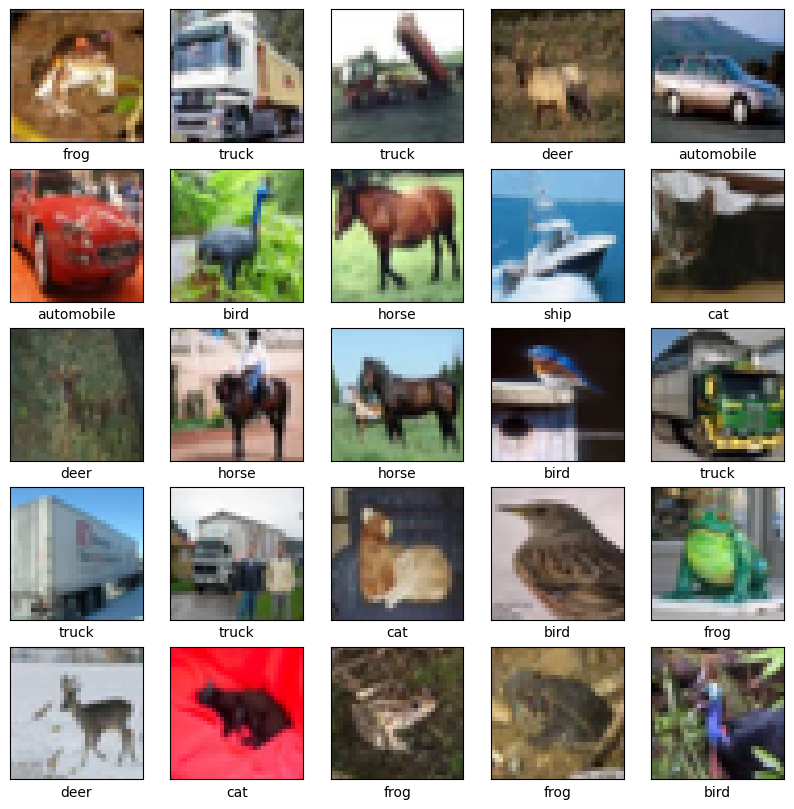

In [51]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i])
    plt.xlabel(class_names[y_train[i][0]])
plt.show()

In [78]:
def create_model():
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    
    model.add(layers.Flatten())
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(10))

    model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

    return model

In [80]:
#Extra cell
model = create_model()
model.summary()

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_39 (Conv2D)                   │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_39 (MaxPooling2D)      │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_40 (Conv2D)                   │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_40 (MaxPooling2D)      │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_41 (Conv2D)                   │ (None, 4, 4, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_41 (MaxPooling2D)      │ (None, 2, 2, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_13 (Flatten)                 │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_26 (Dense)                     │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_27 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 160,202 (625.79 KB)

 Trainable params: 160,202 (625.79 KB)

 Non-trainable params: 0 (0.00 B)

In [101]:
# Set parameters for k-fold cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
cross_val_scores = []

i=0
# Perform 5-fold cross-validation
for train_index, val_index in kfold.split(x_train):
    i+=1
    model = create_model()
    model.fit(x_train[train_index], y_train[train_index], epochs=10, batch_size=64, verbose=1,
              validation_data=(x_train[val_index], y_train[val_index]))
    val_accuracy = model.evaluate(x_train[val_index], y_train[val_index], verbose=0)[1]
    cross_val_scores.append(val_accuracy)
    print(f"Cross-validation accuracy for split {i} : {val_accuracy}\n")
    
# Calculate average cross-validation accuracy
avg_cross_val_accuracy = np.mean(cross_val_scores)
print(f"Average 5-Fold Cross-Validation Accuracy: {avg_cross_val_accuracy:.4f}")

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 19s 26ms/step - accuracy: 0.3277 - loss: 1.8234 - val_accuracy: 0.5087 - val_loss: 1.3766
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 17s 26ms/step - accuracy: 0.5453 - loss: 1.2843 - val_accuracy: 0.6073 - val_loss: 1.1079
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 17s 27ms/step - accuracy: 0.6177 - loss: 1.0841 - val_accuracy: 0.6300 - val_loss: 1.0392
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 12s 20ms/step - accuracy: 0.6562 - loss: 0.9688 - val_accuracy: 0.6617 - val_loss: 0.9683
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 14s 23ms/step - accuracy: 0.6997 - loss: 0.8603 - val_accuracy: 0.6645 - val_loss: 0.9551
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 16s 26ms/step - accuracy: 0.7201 - loss: 0.7978 - val_accuracy: 0.6904 - val_loss: 0.8896
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 16s 26ms/step - accuracy: 0.7509 - loss: 0.7183 - val_accuracy: 0.7057 - val_loss: 0.8483
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 20s 25ms/step - accuracy: 0.7722 - loss: 0.6598 - 

In [87]:
# Evaluate the final model on test data
model = create_model()
model.summary()
history = model.fit(x_train, y_train, epochs=10, batch_size=64,validation_data=(x_test, y_test))
# test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
# print(f"Test Accuracy: {test_accuracy:.4f}")

Model: "sequential_20"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_60 (Conv2D)                   │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_60 (MaxPooling2D)      │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_61 (Conv2D)                   │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_61 (MaxPooling2D)      │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_62 (Conv2D)                   │ (None, 4, 4, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_62 (MaxPooling2D)      │ (None, 2, 2, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_20 (Flatten)                 │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_40 (Dense)                     │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_41 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 160,202 (625.79 KB)

 Trainable params: 160,202 (625.79 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 21s 20ms/step - accuracy: 0.3277 - loss: 1.8047 - val_accuracy: 0.5354 - val_loss: 1.3026
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 20s 26ms/step - accuracy: 0.5527 - loss: 1.2429 - val_accuracy: 0.5724 - val_loss: 1.1984
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 19s 25ms/step - accuracy: 0.6353 - loss: 1.0471 - val_accuracy: 0.6217 - val_loss: 1.0681
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 21s 26ms/step - accuracy: 0.6720 - loss: 0.9404 - val_accuracy: 0.6864 - val_loss: 0.9062
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 20s 26ms/step - accuracy: 0.7047 - loss: 0.8511 - val_accuracy: 0.6896 - val_loss: 0.8966
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 19s 25ms/step - accuracy: 0.7329 - loss: 0.7697 - val_accuracy: 0.6928 - val_loss: 0.8885
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 20s 25ms/step - accuracy: 0.7538 - loss: 0.7066 - val_accuracy: 0.7082 - val_loss: 0.8641
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 21s 27ms/step - accuracy: 0.7739 - loss: 0.6499 - 

313/313 - 2s - 8ms/step - accuracy: 0.7207 - loss: 0.8579
Test Accuracy: 0.7207


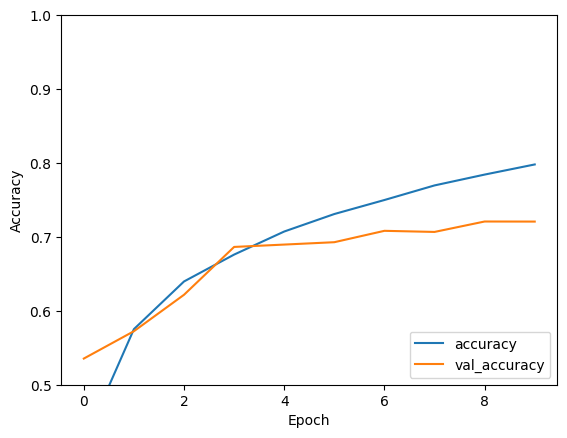

In [89]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_accuracy = model.evaluate(x_test,  y_test, verbose=2)
print(f"Test Accuracy: {test_accuracy:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


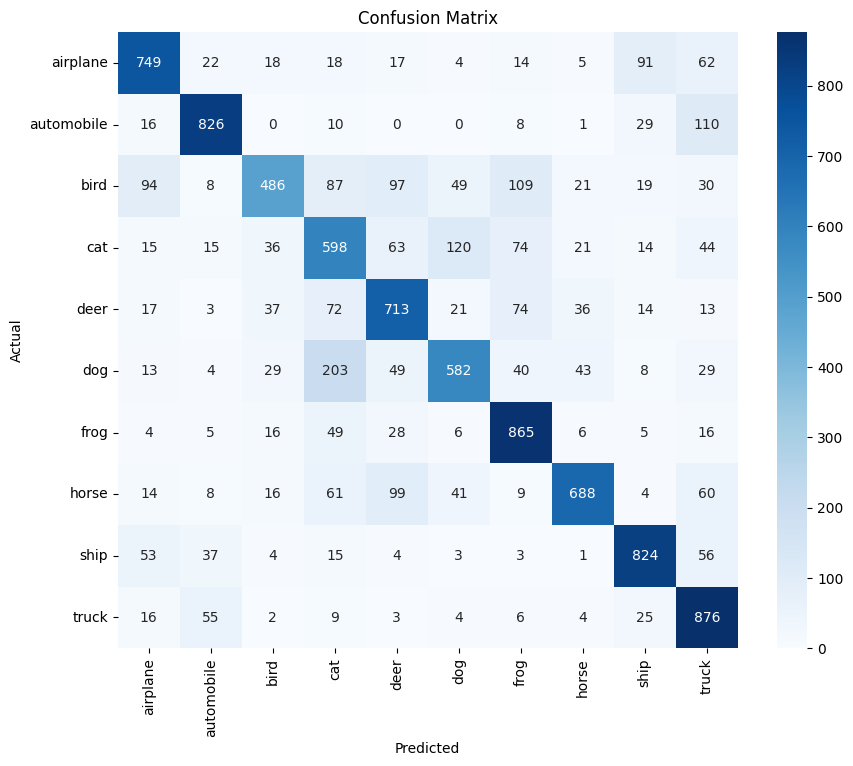

In [95]:

# Predict classes for the test set
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = y_test.flatten()

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names,
                yticklabels=class_names)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()


In [98]:
# Classification Report (Precision, Recall, F1-score per class)
class_report = classification_report(y_true, y_pred_classes, target_names=class_names)
print("Classification Report:\n", class_report)

Classification Report:
               precision    recall  f1-score   support

    airplane       0.76      0.75      0.75      1000
  automobile       0.84      0.83      0.83      1000
        bird       0.75      0.49      0.59      1000
         cat       0.53      0.60      0.56      1000
        deer       0.66      0.71      0.69      1000
         dog       0.70      0.58      0.64      1000
        frog       0.72      0.86      0.79      1000
       horse       0.83      0.69      0.75      1000
        ship       0.80      0.82      0.81      1000
       truck       0.68      0.88      0.76      1000

    accuracy                           0.72     10000
   macro avg       0.73      0.72      0.72     10000
weighted avg       0.73      0.72      0.72     10000



<font color='blue'>Comment on the results of the above experiment, including which classes were difficult to classify and your opinion. Mention whether you think the experiment was successful, and what your learnt from it.</font>

**Answer** <font color='green'>Showing reasonably balanced performance accross the classes, the model has achieved an overall accuracy of 72% with a macro average F1-score of 0.72  .
Considering classes, the model has performed well on the automobile, ship classes well with 0.83 and 0.81 f1 scores respectively. However classes like bird, cat shows relatively lower f1 scores of 0.59 and 0.56 respectively. These classes may share similarities in textures and shapes with other classes. Therefore confusion may happen. Overall, the experiment demonstrates moderate success. The model managed a reasonable accuracy. With this activity, I learnt that some classes may require more complex and deeper model architectures to capture their subtle differences. </font>